Os dados quakes.csv representam dodos reais de terremotos (nao sei de que período). 
A primeira coluna é a profundidade do terremoto, a segunda e terceira a latitude e 
longitude e a quarta a scala Richer do terremoto. Nos queremos descobrir se há 
clusters/grupos de terremotos.

Estandarize cada coluna

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from sklearn.metrics import silhouette_samples
from sklearn.neighbors import NearestNeighbors


columns_name = ['profundidade', 'latitude','longitude', 'scala']
# lê os dados do csv
dataset= pd.read_csv(
    '/home/mauricio/projects/MO444/lista 7/quakes.csv', 
    names=columns_name).values

# Standarizaçao
standard_scaler = StandardScaler()
standardized_data =  standard_scaler.fit_transform(dataset)
print(standardized_data[:10])

[[-0.35520086 -1.97199797 -0.22393957  3.81670737]
 [-0.32943675  1.23018213  0.80788009 -0.9355697 ]
 [-0.14908799  1.10967878  0.73930527 -0.9355697 ]
 [-0.06320763  0.69512106  0.72559031  1.17655344]
 [-0.38096497 -0.9699864   0.96673808  0.12049187]
 [-0.63860605  0.49537365  0.55251251  1.17655344]
 [ 0.55513097 -0.93855074  0.96766363  0.64852266]
 [-0.12332388  0.47048709  0.32533212  0.12049187]
 [-0.20920424 -0.70736768  0.93434384  0.12049187]
 [ 0.38337025 -0.7947981  -1.06501185  0.12049187]]


Rode o K-means para K=2..10, use random_state=1, e imprima 
(com 2 casas decimais) a sillouette média e o índice de 
Calinski-Harabaz. Qual parece ser o melhor valor/valores 
para K?

In [2]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for nr_clusters in clusters:
    kmeans = KMeans(n_clusters=nr_clusters , random_state=1, n_jobs=8)
    kmeans_model = kmeans.fit(standardized_data)
    labels = kmeans_model.labels_
    silhouete_avg =  silhouette_score(
            standardized_data, labels, metric='euclidean')
    calinski_harabaz = calinski_harabaz_score(standardized_data,labels)
    print(" {} clusters - silhouete {:.2f}, calinski harabaz {:.2f} ".
          format(nr_clusters, silhouete_avg, calinski_harabaz))


 2 clusters - silhouete 0.32, calinski harabaz 675.01 
 3 clusters - silhouete 0.35, calinski harabaz 785.77 
 4 clusters - silhouete 0.34, calinski harabaz 866.58 
 5 clusters - silhouete 0.34, calinski harabaz 957.38 
 6 clusters - silhouete 0.36, calinski harabaz 1002.26 
 7 clusters - silhouete 0.37, calinski harabaz 971.10 
 8 clusters - silhouete 0.36, calinski harabaz 949.09 
 9 clusters - silhouete 0.36, calinski harabaz 939.45 
 10 clusters - silhouete 0.36, calinski harabaz 924.38 


**Podemos ver que as melhores métricas ficaram para 7 clusters considerando 
silhouette e 6 clusters se considerarmos o índice calinski harabaz. 
Como a diferença do silhouette de 6 para 7 clusters é bem pequena (0.36 e 0.37) , 
vou imprimir o gráfico da distribuição da silhouette dos clusters 6 e 7 de cada 
amostra para verificar se ele traz alguma informação adicional que ajude a decidir**

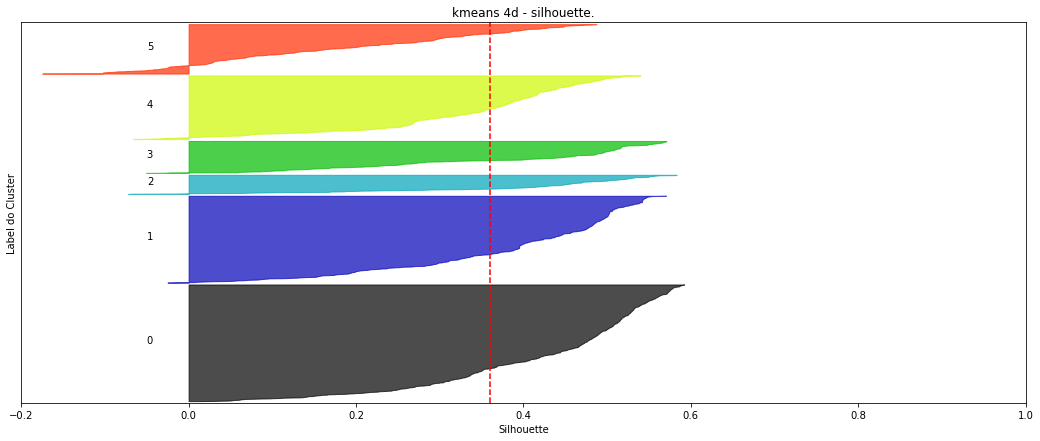

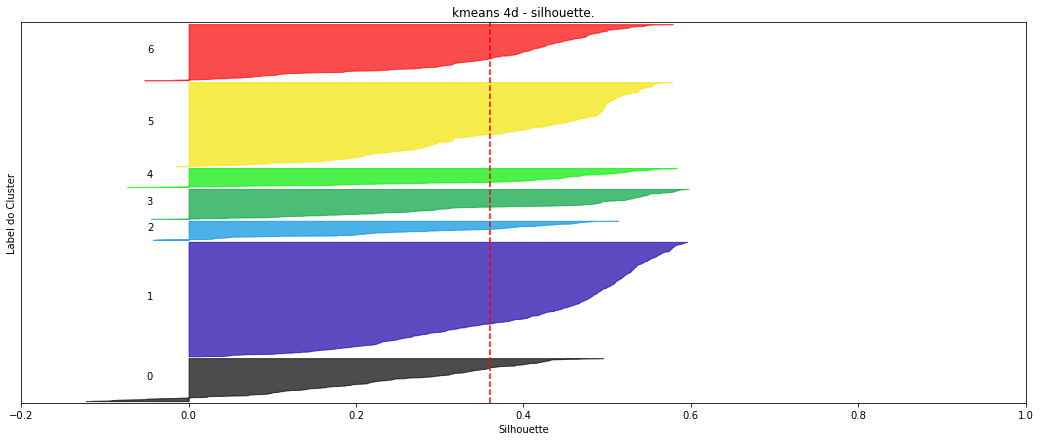

In [3]:
# Vou restringir somente 6 e 7 clusters
clusters = [6, 7]
for nr_clusters in clusters:
    # Subplot de 1 linha e 1 coluna
    fig, (ax) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)
    # Silhouette pode ir de -1 a 1
    ax.set_xlim([-0.2, 1])
    # Ajusta eixo y
    ax.set_ylim([0, len(standardized_data) + (nr_clusters+ 1) * 10])
######################################################################### 
# ESSE TRECHO DO CODIGO QUE COMPUTA TODA A LOGICA A MAIORIA DO CODIGO 
# ANTES E DEPOIS DESSAS MARCAÇOES SÃO PARA ERAÇAO DO GRAFICO SILHOUETTE
    kmeans = KMeans(n_clusters=nr_clusters , random_state=1, n_jobs=8)
    kmeans_model = kmeans.fit(standardized_data)
    labels = kmeans_model.labels_
    # Silhouette scores para cada amostra
    sample_silhouette_values=silhouette_samples(standardized_data,labels)    
##########################################################################     
    
    y_lower = 10
    for i in range(nr_clusters):
        # Agrega silhouette scores por amostra de cada cluster e ordena
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / nr_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label do silhouette com o nr do cluster no meio
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute novo y_lower para o proximo plot
        y_lower = y_upper + 10 
    
    ax.set_title("kmeans 4d - silhouette.")
    ax.set_xlabel("Silhouette")
    ax.set_ylabel("Label do Cluster")
    ax.axvline(x=silhouete_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])    
    plt.show()  

**Normalmente o gráfico que indica mais valores mais próximos de 1 seria a melhor escolha, 
nesse caso até nisso as opções de 6 e 7 clusrers são parecidos. Aparentemente a opção de 
 6 clusters seria ligeiramnete melhor (tem mais valores acima da linha vermelha), 
mas a diferença é pequena entatão qualquer um das duas opções seria uma boa opção**

Talvez os dados de latitude e longitude estao estragando a clusterizacao. Remova essa colunas e repita a tarefa acima? Discuta os resultados

In [4]:
# remove as duas colunas
data_removed_columns = np.delete(standardized_data ,[1,2],1)

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for nr_clusters in clusters:
    kmeans = KMeans(n_clusters=nr_clusters , random_state=1, n_jobs=8)
    kmeans_model = kmeans.fit(data_removed_columns)
    labels = kmeans_model.labels_
    silhouete_avg =  silhouette_score(
            data_removed_columns, labels, metric='euclidean')
    calinski_harabaz = calinski_harabaz_score(data_removed_columns,labels)
    print(" {} clusters - silhouete {:.2f}, calinski harabaz {:.2f} ".
          format(nr_clusters, silhouete_avg, calinski_harabaz))

 2 clusters - silhouete 0.70, calinski harabaz 1483.64 
 3 clusters - silhouete 0.58, calinski harabaz 3087.43 
 4 clusters - silhouete 0.51, calinski harabaz 3216.86 
 5 clusters - silhouete 0.53, calinski harabaz 3125.96 
 6 clusters - silhouete 0.51, calinski harabaz 3160.03 
 7 clusters - silhouete 0.49, calinski harabaz 3101.35 
 8 clusters - silhouete 0.49, calinski harabaz 3156.70 
 9 clusters - silhouete 0.50, calinski harabaz 3181.74 
 10 clusters - silhouete 0.52, calinski harabaz 3362.36 


**Podemos ver que os resultados entre as duas medidas são muito divergentes. 
Para a silhouette o melhor resultado foi 0.70 com 2 clusters e para o calinski harabaz 
foi 3362.6 para 10 clusters. Como são duas dimensões podemos colocar os dados em 2 eixos 
mostrando como ficaram a distribuição dos clusters, vamos fazer isso para 2 e 10 clusters 
além de mostrar  gráfico da silhouette como no exemplo anterior**

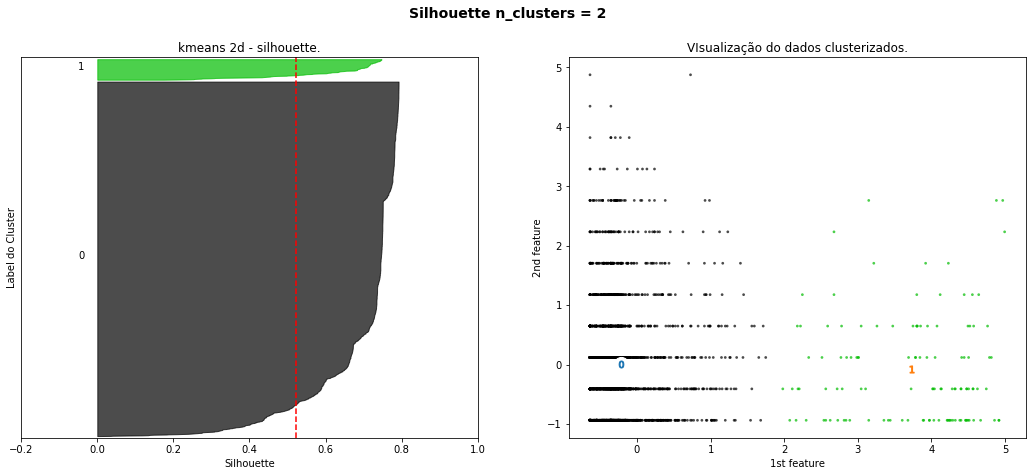

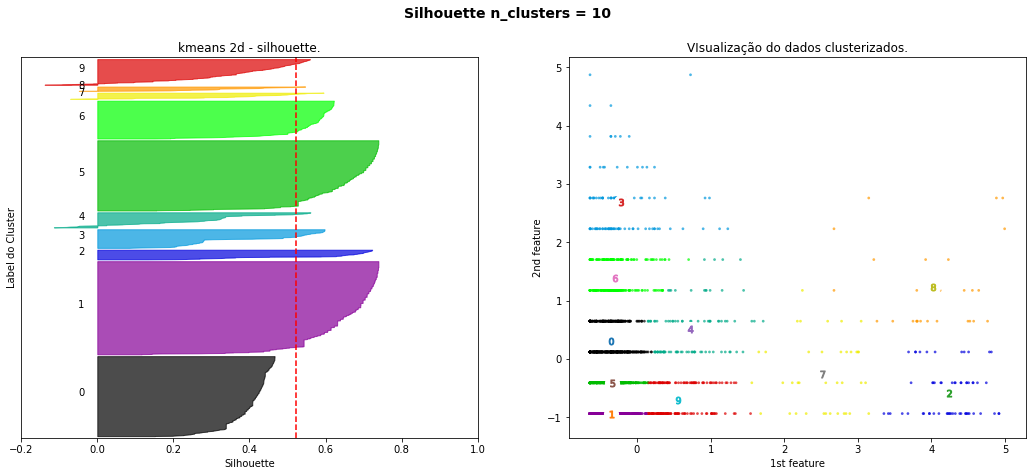

In [5]:
clusters = [2, 10]

for nr_clusters in clusters:
    # Subplot de 1 linha e 2 coluna, agora que os dados sao de 2 dimensoes 
    # podemos plotar os mesmos para visualizaçao
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    # Silhouette pode ir de -1 a 1
    ax1.set_xlim([-0.2, 1])
    # Ajusta eixo y
    ax1.set_ylim([0, len(data_removed_columns) + (nr_clusters+ 1) * 10])
########################################################################### 
# ESSE TRECHO DO CODIGO QUE COMPUTA TODA A LOGICA A MAIORIA DO CODIGO 
# ANTES E DEPOIS DESSAS MARCAÇOES SAO PARA GERAÇAO DO GRAFICO SILHOUETTE
    kmeans = KMeans(n_clusters=nr_clusters , random_state=1, n_jobs=8)
    kmeans_model = kmeans.fit(data_removed_columns)
    labels = kmeans_model.labels_
    # Silhouette scores para cada amostra
    sample_silhouette_values = silhouette_samples(
        data_removed_columns,labels)    
###########################################################################     
    y_lower = 10
    for i in range(nr_clusters):
        # Agrega silhouette scores por amostra de cada cluster e ordena
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / nr_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label do silhouette com o nr do cluster no meio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute novo y_lower para o proximo plot
        y_lower = y_upper + 10 
    
    ax1.set_title("kmeans 2d - silhouette.")
    ax1.set_xlabel("Silhouette")
    ax1.set_ylabel("Label do Cluster")
    ax1.axvline(x=silhouete_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])  
    
    # 2nd Plot
    colors = cm.spectral(labels.astype(float) / nr_clusters)
    ax2.scatter(data_removed_columns[:, 0], 
                data_removed_columns[:, 1], 
                marker='.', 
                s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling clusters
    centers = kmeans_model.cluster_centers_
    # Desenha circulos nos centros do cluster
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("VIsualização do dados clusterizados.")
    ax2.set_xlabel("1st feature")
    ax2.set_ylabel("2nd feature")

    plt.suptitle(("Silhouette n_clusters = %d" % nr_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


**Olhando para os gráficos a opção de 2 clusters seria melhor do que a de 10, 
tanto olhando para o gáfico da silhouette, onde existem mais valores acima da 
linha vermelha para 2 clusters, quanto no gráfico de como ficaram divididos os 
pontos em cada cluster, mas mesmo assim devemos reavaliar a remoção das colunas, 
pois da forma que colocamos os pontos do gráfico não me parece em nenhum dos casos 
que o agrupamento de dados consistente**

Rode a clusterizacao hierárquica (metodo Ward) para 2..10 clusters para os dados de 4 
dimensões e calcule os 2 índices acima? Qual o melhor/melhores valores do numero de 
clusters?

In [6]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for nr_clusters in clusters:
    hierarchical = AgglomerativeClustering(
        n_clusters=nr_clusters, linkage='ward')
    hierarchical_model = hierarchical.fit(standardized_data)
    labels = hierarchical_model.labels_
    silhouete_avg =  silhouette_score(
            standardized_data, labels, metric='euclidean')
    calinski_harabaz =  calinski_harabaz_score(standardized_data, labels)
    print(" {} clusters - silhouete {:.2f}, calinski harabaz {:.2f} ".
          format(nr_clusters, silhouete_avg, calinski_harabaz))

 2 clusters - silhouete 0.31, calinski harabaz 536.44 
 3 clusters - silhouete 0.33, calinski harabaz 698.08 
 4 clusters - silhouete 0.26, calinski harabaz 731.08 
 5 clusters - silhouete 0.29, calinski harabaz 771.95 
 6 clusters - silhouete 0.31, calinski harabaz 750.03 
 7 clusters - silhouete 0.31, calinski harabaz 741.82 
 8 clusters - silhouete 0.31, calinski harabaz 733.85 
 9 clusters - silhouete 0.31, calinski harabaz 745.43 
 10 clusters - silhouete 0.32, calinski harabaz 749.07 


**Os dados do silhouette ficaram muito próximos um do outro, vamos considerar nesse caso o 
índice  calinski harabaz (771.95) para 5 clusters**

Rode o DBScan nos dados de 4 dimensões. Use 5 como min_samples. Construa o grafico da distância 
dos 5-NN e descubra o valor do eps. (Se voce nao conseguir gerar o gráfico, use eps = 0.75 mas 
essa opçã perderá alguns pontos nesta questão). Qual o número de clusters? Calcule os índices 
acima para os clusteres.

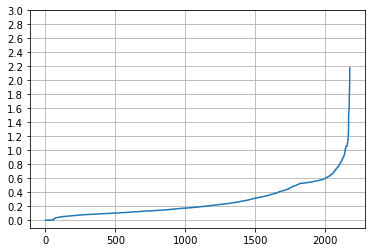

In [7]:
nbrs = NearestNeighbors(n_neighbors=5).fit(standardized_data)
distances, indices = nbrs.kneighbors(standardized_data)

sorted_distances = np.sort(distances[:,-1])
plt.plot(sorted_distances)
plt.yticks(np.arange(min(sorted_distances), max(sorted_distances)+1, 0.2))
plt.grid(True)
plt.show()  

**O valor do parâmetro EPS deve ser no cotovelo do gráfico (entre 0.6 e 0.8) 
vamos considerar 0.7**

In [8]:
dbscan = DBSCAN(eps=0.70, min_samples= 5)
dbscan_model = dbscan.fit(standardized_data)
labels = dbscan_model.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
silhouete_avg = silhouette_score(
    standardized_data, labels, metric='euclidean')
calinski_harabaz =  calinski_harabaz_score(standardized_data, labels)
print(" silhouete {:.2f} calinski harabaz {:.2f} nr de clusters {}".
      format(silhouete_avg, calinski_harabaz, n_clusters_))

 silhouete 0.08 calinski harabaz 94.44 nr de clusters 7


**Analisando todos os algoritmos podemos ver que se removermos 2 colunas, apesar dos 
valores de silhouette serem maiores, os índices indicaram resultados muito discrepantes, 
além de que os gŕaficos com os pontos em cada cluster não nos trouxe nenhuma convicção 
de que aquela era a melhor opção. 
Usando as 4 dimensões os valores de cluster ficaram entre 5 e 7, como dois algoritmos 
indicaram 7 cluster essa seria a minha escolha**